<a href="https://www.kaggle.com/code/akanshakhandelwal08/digit-recognizer-cnn?scriptVersionId=95942135" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPool2D, Conv2D,BatchNormalization
from keras.callbacks import ReduceLROnPlateau

Reading Train and Test CSV

In [3]:
X_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
X_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

y_train = X_train.pop('label')

In [4]:
print(X_train.shape)
print(y_train.shape)

(42000, 784)
(42000,)


In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

In [6]:
img_rows,img_cols=28,28
input_shape = (img_rows,img_cols,1)
batch_size=128
num_classes =10
epochs = 20

Reshaping to Single Channel

In [7]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

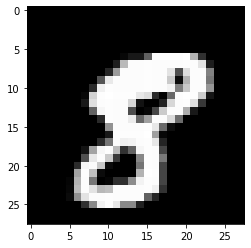

In [8]:
index  = 10
k = X_train[index,:]
k = k.reshape((28, 28))
plt.imshow(k, cmap='gray')

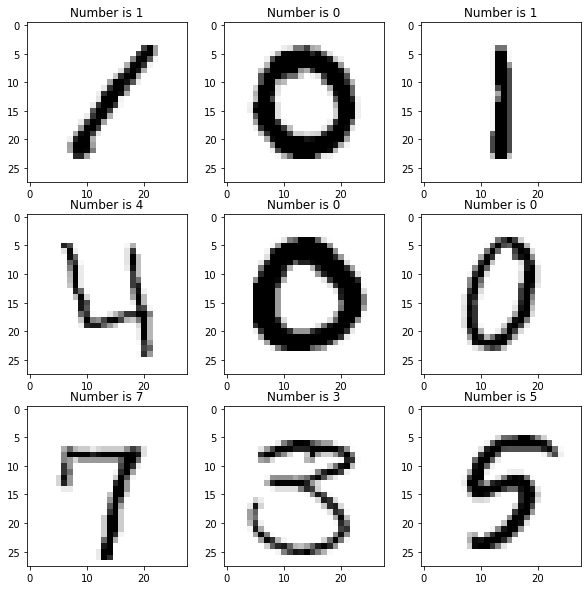

In [9]:
fig, axis=plt.subplots(3, 3, figsize=(10, 10))
y_train1 = y_train.reshape(1, len(y_train))
for index, ax in enumerate(axis.flat):
        ax.imshow(X_train[index],cmap=plt.cm.binary)
        ax.set(title = f"Number is {y_train1[0,index]}")

Comverting Class Labels to One Hot Encoded Vectors

In [10]:
# convert class labels (from digits) to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
print(y_train.shape)

(42000, 10)


In [11]:
X_train.dtype

dtype('int64')

In [12]:
# convert int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalise
X_train /= 255
X_test /= 255

Training Model

In [13]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same',input_shape=(img_rows, img_cols, 1),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding = 'same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


          

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        1

2022-05-18 12:25:23.596090: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
lr_reduction = ReduceLROnPlateau(monitor='val_loss',patience=4, verbose=1,  factor=0.4, min_lr=0.0001)

model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer = 'adam',
             metrics = ['accuracy'])


In [15]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,callbacks=[lr_reduction])

2022-05-18 12:25:24.184771: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
329/329 [==============================] - 94s 281ms/step - loss: 0.1459 - accuracy: 0.9546
Epoch 2/20
329/329 [==============================] - 94s 285ms/step - loss: 0.0527 - accuracy: 0.9828
Epoch 3/20
329/329 [==============================] - 93s 283ms/step - loss: 0.0387 - accuracy: 0.9877
Epoch 4/20
329/329 [==============================] - 93s 283ms/step - loss: 0.0305 - accuracy: 0.9901
Epoch 5/20
329/329 [==============================] - 93s 282ms/step - loss: 0.0268 - accuracy: 0.9910
Epoch 6/20
329/329 [==============================] - 92s 280ms/step - loss: 0.0292 - accuracy: 0.9899
Epoch 7/20
329/329 [==============================] - 93s 284ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 8/20
329/329 [==============================] - 93s 284ms/step - loss: 0.0199 - accuracy: 0.9934
Epoch 9/20
329/329 [==============================] - 93s 283ms/step - loss: 0.0157 - accuracy: 0.9946
Epoch 10/20
329/329 [==============================] - 93s 284ms/step - l

Model Prediction

In [16]:
X_test_pred = model.predict(X_test)

In [17]:
X_test_pred.shape

(28000, 10)

In [18]:
output = pd.DataFrame({"Label": X_test_pred.argmax(axis=1)}, index=range(1, 28001))
output.index.name = "ImageId"
output.head()

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3


In [19]:
output.to_csv("submission.csv")